## 預測金融客戶是否流失

### 讀取資料

In [1]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/Churn_Modelling.csv', index_col = 0)
df.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


### 資料預處理

In [3]:
y = df['Exited']
del df['Exited']

In [4]:
del df['Surname']

In [5]:
del df['CustomerId']

In [6]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
geo = pandas.get_dummies(df['Geography'])
del geo['France']
geo.head()

,Germany,Spain
RowNumber,,
1,0,0
2,0,1
3,0,0
4,0,0
5,0,1


In [9]:
gender = pandas.get_dummies(df['Gender'])
del gender['Female']
gender.head()

,Male
RowNumber,
1,0
2,0
3,0
4,0
5,0


In [10]:
del df['Geography']
del df['Gender']
customer = pandas.concat([df, geo, gender], axis = 1 )
customer.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
RowNumber,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,0,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,1,0
3,502,42,8,159660.80,3,1,0,113931.57,0,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [11]:
X = customer.values

In [46]:
X.shape

(10000, 11)

In [47]:
y.shape

(10000,)

### 資料標準化 

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [48]:
X

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ..., -0.57873591,
         1.74273971, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57873591,
        -0.57380915, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  1.72790383,
        -0.57380915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57873591,
        -0.57380915, -1.09598752]])

### 建構模型

In [49]:
from keras.layers import Dense, Activation
from keras.models   import Sequential

In [50]:
model = Sequential()
model.add(Dense(6, activation='relu', input_shape=(11,)))
model.add(Dense(6, activation='relu'))
model.add(Dense(1,  activation='sigmoid'))

In [51]:

model.compile(loss='binary_crossentropy',
              optimizer='SGD',
              metrics=['accuracy']
             )

In [53]:
import keras
tbCallBack   = keras.callbacks.TensorBoard(log_dir='./Graph2', histogram_freq=0, write_graph=True, write_images=True)
tbCheckpoint = keras.callbacks.ModelCheckpoint('model.h5', monitor='val_loss', verbose=0)

history = model.fit(X, y,
                    batch_size=100,
                    epochs=10,
                    verbose=1,
                    callbacks = [tbCallBack,tbCheckpoint])

Epoch 1/10
10000/10000 [==============================] - 0s 7us/step - loss: 0.4586 - acc: 0.8010
Epoch 2/10
10000/10000 [==============================] - 0s 7us/step - loss: 0.4557 - acc: 0.8019
Epoch 3/10
10000/10000 [==============================] - 0s 8us/step - loss: 0.4528 - acc: 0.8039
Epoch 4/10
10000/10000 [==============================] - 0s 9us/step - loss: 0.4501 - acc: 0.8041
Epoch 5/10
10000/10000 [==============================] - 0s 7us/step - loss: 0.4475 - acc: 0.8050
Epoch 6/10
10000/10000 [==============================] - 0s 6us/step - loss: 0.4450 - acc: 0.8056
Epoch 7/10
10000/10000 [==============================] - 0s 7us/step - loss: 0.4428 - acc: 0.8070
Epoch 8/10
10000/10000 [==============================] - 0s 7us/step - loss: 0.4407 - acc: 0.8085
Epoch 9/10
10000/10000 [==============================] - 0s 7us/step - loss: 0.4387 - acc: 0.8087
Epoch 10/10
10000/10000 [==============================] - 0s 7us/step - loss: 0.4369 - acc: 0.8097


### 使用模型做預測

In [33]:
predicted = model.predict(X)

In [37]:
predicted = (predicted > 0.5).flatten().astype(int)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y, predicted)

0.864

In [40]:
confusion_matrix(y, predicted)

array([[7662,  301],
       [1059,  978]], dtype=int64)

## Incremental Learning
- https://scikit-learn.org/0.15/modules/scaling_strategies.html

## 比較優化器

### 讀取客戶流失數據

In [54]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/customer_churn.csv', index_col=0, header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


### 數據預處理

In [55]:
df = df.iloc[:,3:]

In [56]:
cat_var = ['international_plan','voice_mail_plan', 'churn']

for var in cat_var:
    df[var] = df[var].map(lambda e: 1 if e == 'yes' else 0)

In [57]:
y = df.iloc[:,-1]
x = df.iloc[:,:-1]

### 區分訓練與測試數據集

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size = 0.33, random_state = 42)

In [62]:
x_train.shape

(2233, 16)

In [63]:
x_test.shape

(1100, 16)

In [64]:
y_train.shape

(2233,)

In [65]:
y_test.shape

(1100,)

### 資料標準化 

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [70]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [71]:
def tarinProcess(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    history = classifier.fit(x_train, y_train,
                        batch_size=10,
                        epochs=100,
                        verbose=0,
                        validation_data=(x_test, y_test))
    return history

In [72]:
history1 = tarinProcess('sgd')

In [73]:
history2 = tarinProcess('RMSprop')

In [74]:
history3 = tarinProcess('Adagrad')

In [75]:
history4 = tarinProcess('Adadelta')

In [76]:
history5 = tarinProcess('Adam')

### 比較優化器

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['var']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


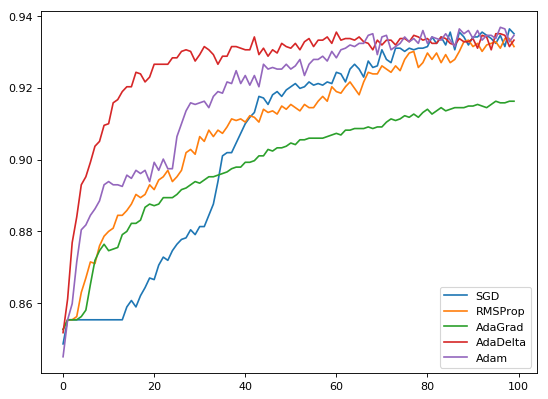

In [78]:
%pylab inline
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(history1.epoch, history1.history['acc'], label='SGD')
plt.plot(history2.epoch, history2.history['acc'], label='RMSProp')
plt.plot(history3.epoch, history3.history['acc'], label='AdaGrad')
plt.plot(history4.epoch, history4.history['acc'], label='AdaDelta')
plt.plot(history5.epoch, history5.history['acc'], label='Adam')
plt.legend()
plt.show()

In [96]:
from sklearn.preprocessing import StandardScaler
import numpy as np
ms = StandardScaler()
a = np.array([0,2,4,6,8,10,12]).reshape(-1,1)
b = np.array([2,6,14]).reshape(-1,1)
a = ms.fit_transform(a)
b = ms.transform(b)
#b
b

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.],
       [ 0.],
       [ 2.]])

In [98]:
ms.mean_

array([6.])

In [99]:
ms.var_

array([16.])

In [100]:
from sklearn.preprocessing import StandardScaler
import numpy as np
ms = StandardScaler()
a = np.array([0,2,4,6,8,10,12]).reshape(-1,1)
b = np.array([2,6,14]).reshape(-1,1)
ms.fit(a)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [101]:
ms.mean_

array([6.])

In [102]:
ms.var_

array([16.])

In [103]:
a

array([[ 0],
       [ 2],
       [ 4],
       [ 6],
       [ 8],
       [10],
       [12]])

In [104]:
a = ms.transform(a)
a

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

## 交叉驗證

In [105]:
import keras
from keras.models import Sequential
from keras.layers import Dense

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [106]:
def buildClassifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    return classifier

In [109]:
classifier = KerasClassifier(build_fn = buildClassifier, batch_size = 10, epochs = 100,verbose = 0, optimizer = 'adam')

In [110]:
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5)

In [112]:
accuracies

array([0.8590604 , 0.8590604 , 0.88814317, 0.84529147, 0.91255605])

In [113]:
accuracies.mean()

0.8728222967660336

In [114]:
accuracies.std()

0.024290847545262305

## 避免過度學習
- https://hackernoon.com/memorizing-is-not-learning-6-tricks-to-prevent-overfitting-in-machine-learning-820b091dc42

In [115]:
from keras.layers import Dropout

In [116]:
def buildClassifierWithDropout(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))
    classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    return classifier

In [117]:
classifier = KerasClassifier(build_fn = buildClassifierWithDropout, batch_size = 10, epochs = 100, verbose = 0, optimizer='adam' )

In [118]:
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [119]:
accuracies

array([0.84116331, 0.87472035, 0.88814317, 0.85874439, 0.84529147])

In [120]:
accuracies.mean()

0.8616125372346117

In [121]:
accuracies.std()

0.017711373112045656

## Grid Search

In [124]:
from sklearn.model_selection import GridSearchCV
classifier = KerasClassifier(build_fn = buildClassifierWithDropout, verbose = 0, epochs = 10)
parameters = {'batch_size': [10, 15],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)


In [125]:
grid_search     = grid_search.fit(x_train, y_train)

In [126]:
best_parameters = grid_search.best_params_


In [127]:
best_parameters

{'batch_size': 15, 'optimizer': 'rmsprop'}

In [128]:
best_accuracy   = grid_search.best_score_

In [129]:
best_accuracy

0.864308105687416

## 切出 Validation Data 

In [132]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/customer_churn.csv', index_col=0, header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [133]:
df = df.iloc[:,3:]
cat_var = ['international_plan','voice_mail_plan', 'churn']

for var in cat_var:
    df[var] = df[var].map(lambda e: 1 if e == 'yes' else 0)

y = df.iloc[:,-1]
x = df.iloc[:,:-1]

In [134]:
from sklearn.model_selection import train_test_split
x_train, x_tmp, y_train, y_tmp = train_test_split(x, y, test_size = 0.4, random_state = 123)
x_val, x_test, y_val, y_test = train_test_split(x_tmp, y_tmp, test_size = 0.5, random_state = 123)

In [136]:
x_train.shape

(1999, 16)

In [137]:
x_val.shape

(667, 16)

In [138]:
x_test.shape

(667, 16)

In [140]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

In [141]:
x_val = sc.transform(x_val)
x_test = sc.transform(x_test)

In [142]:
classifier = Sequential()
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

history = classifier.fit(x_train, y_train,
                        batch_size=10,
                        epochs=100,
                        verbose=0,
                        validation_data=(x_val, y_val))

In [211]:
pred = classifier.predict(x_test)

In [146]:
predicted = (pred > 0.5).flatten().astype(int)

In [148]:
accuracy_score(y_test, predicted)

0.8830584707646177

In [149]:
confusion_matrix(y_test, predicted)

array([[570,   4],
       [ 74,  19]], dtype=int64)

In [165]:
predicted2 = (pred > 0.2).flatten().astype(int)

In [166]:
accuracy_score(y_test, predicted2)

0.8050974512743628

In [167]:
confusion_matrix(y_test, predicted2)

array([[469, 105],
       [ 25,  68]], dtype=int64)

## Confusion Matrix

In [150]:
confusion_matrix(y_test, predicted)

array([[570,   4],
       [ 74,  19]], dtype=int64)

In [151]:
#       0    1
#  0   570   4
#  1    74  19
#

(19 + 4) * 2000
74 * 12000

#      
#    TP    FP
#    FN    TN
#

## 繪製ROC 曲線

In [180]:
m = confusion_matrix(y_test, predicted2)
TP = m[0,0]
FP = m[0,1]
FN = m[1,0]
TN = m[1,1]
FPR = FP / (FP + TN)
TPR = TP / (TP + FN)

In [183]:
len(m)

2

In [208]:
FPR_ARY = [1]
TPR_ARY = [1]
for threshold in np.arange(0,1,0.01):
    #print(i)
    pred = classifier.predict(x_test)
    predicted = (pred > threshold).flatten().astype(int)
    m = confusion_matrix(y_test, predicted)
    
    TP = m[0,0]
    FP = m[0,1]
    FN = m[1,0]
    TN = m[1,1]
    if TP > 0 and TN > 0 :
        FPR = FP / (FP + TN)
        TPR = TP / (TP + FN)
        FPR_ARY.append(FPR)
        TPR_ARY.append(TPR)
FPR_ARY.append(0)
TPR_ARY.append(0)

Populating the interactive namespace from numpy and matplotlib


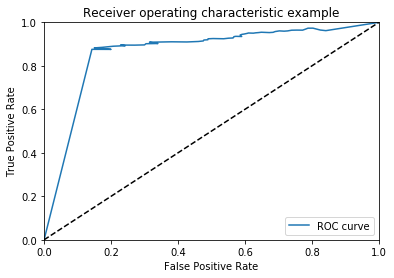

In [209]:
%pylab inline
import matplotlib.pyplot as plt
plt.plot(FPR_ARY, TPR_ARY, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [212]:
pred = classifier.predict(x_test)

In [213]:
from sklearn.metrics import roc_curve
fpr_ary, tpr_ary, thresholds = roc_curve(y_test, pred)

In [216]:
#tpr_ary

Populating the interactive namespace from numpy and matplotlib


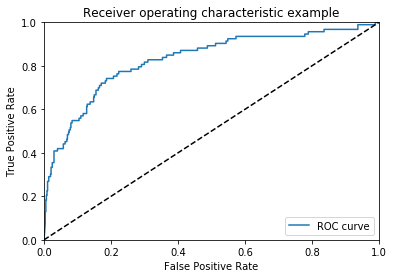

In [217]:
%pylab inline
import matplotlib.pyplot as plt
plt.plot(fpr_ary, tpr_ary, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## 比較不同機器學習模型

### 讀取數據

In [218]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/customer_churn.csv', index_col=0, header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


### 數據預處理

In [219]:
df = df.iloc[:,3:]

In [220]:
cat_var = ['international_plan','voice_mail_plan', 'churn']

for var in cat_var:
    df[var] = df[var].map(lambda e: 1 if e == 'yes' else 0)

In [221]:
y = df.iloc[:,-1]
x = df.iloc[:,:-1]

### 切訓練與測試數據集 

In [222]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)

### 資料標準化

In [223]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### 建立 ANN

In [224]:

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [227]:
classifier = Sequential()
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = classifier.fit(x_train, y_train,
                    batch_size=10,
                    epochs=10)

Epoch 1/10
2233/2233 [==============================] - 2s 969us/step - loss: 0.5480 - acc: 0.8477
Epoch 2/10
2233/2233 [==============================] - 0s 117us/step - loss: 0.3608 - acc: 0.8509
Epoch 3/10
2233/2233 [==============================] - 0s 121us/step - loss: 0.3483 - acc: 0.8509
Epoch 4/10
2233/2233 [==============================] - 0s 132us/step - loss: 0.3426 - acc: 0.8509
Epoch 5/10
2233/2233 [==============================] - 0s 135us/step - loss: 0.3395 - acc: 0.8509
Epoch 6/10
2233/2233 [==============================] - 0s 132us/step - loss: 0.3398 - acc: 0.8509
Epoch 7/10
2233/2233 [==============================] - 0s 126us/step - loss: 0.3388 - acc: 0.8509
Epoch 8/10
2233/2233 [==============================] - 0s 129us/step - loss: 0.3385 - acc: 0.8509
Epoch 9/10
2233/2233 [==============================] - 0s 122us/step - loss: 0.3371 - acc: 0.8509
Epoch 10/10
2233/2233 [==============================] - 0s 119us/step - loss: 0.3392 - acc: 0.8509


### 評估 ANN

In [228]:
y_pred = classifier.predict(x_test)

In [229]:
y_pred

array([[0.44424796],
       [0.16810039],
       [0.03224844],
       ...,
       [0.05236341],
       [0.00960685],
       [0.07928388]], dtype=float32)

In [232]:
predicted = (y_pred > 0.3).flatten().astype(int)

In [233]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

array([[849, 101],
       [ 60,  90]], dtype=int64)

In [234]:
from sklearn.metrics import roc_curve
fpr_ary, tpr_ary, thresholds = roc_curve(y_test, y_pred)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['var']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


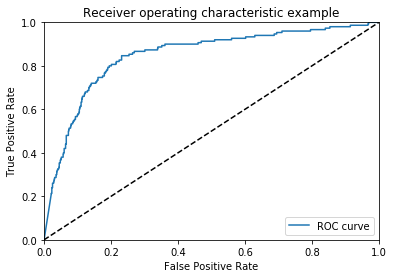

In [235]:
%pylab inline
import matplotlib.pyplot as plt
plt.plot(fpr_ary, tpr_ary, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [238]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9230140350877194

In [236]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(x_train, y_train)

clf2 = SVC(probability = True)
clf2.fit(x_train, y_train)

clf3 = LogisticRegression()
clf3.fit(x_train, y_train)

clf4 = RandomForestClassifier()
clf4.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

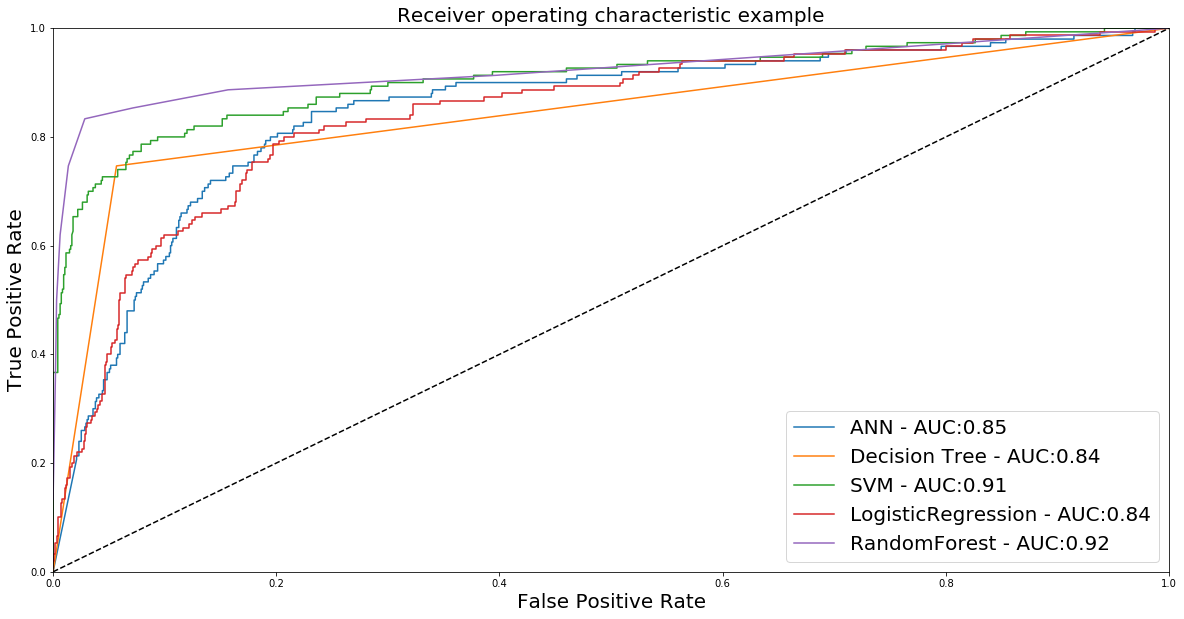

In [237]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize= [20,10])

for clf, title in zip([classifier,clf1,clf2,clf3, clf4], ['ANN','Decision Tree',
                                                          'SVM', 'LogisticRegression', 'RandomForest']):
    if title != 'ANN':
        probas_ = clf.fit(x_train, y_train).predict_proba(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    else:
        y_pred = clf.predict(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

## 圖片處理

In [248]:
from PIL import Image
img = Image.open('building.jpg').convert('L')

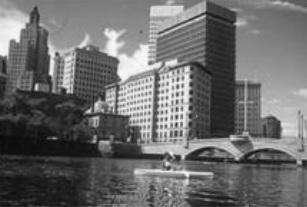

In [258]:
img

In [249]:
import numpy as np
imgary = np.array(img)

In [250]:
imgary.shape

(207, 307)

In [252]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
imgary = sc.fit_transform(imgary)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [255]:
def relu_function(x):
    return np.maximum(0,x)

imgary2 = relu_function(imgary)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['title', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


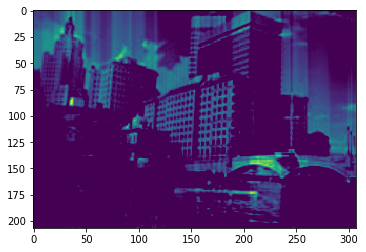

In [257]:

%pylab inline
import matplotlib.pyplot as plt

plt.imshow(imgary2)

## 使用CNN 辨識手寫數字

### 使用傳統類神經網路

#### 引用Keras

In [278]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Conv2D, MaxPooling2D

#### 讀取MNIST 數據

In [279]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [280]:
x_train.shape

(60000, 28, 28)

In [281]:
x_test.shape

(10000, 28, 28)

In [282]:
x_train = x_train.reshape(60000, 784)
x_test  = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

In [283]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

In [284]:
n_hidden_1 = 256
n_hidden_2 = 256 
training_epochs = 15
batch_size = 100

In [285]:
model1 = keras.Sequential()
model1.add(Dense(n_hidden_1, activation='relu',input_shape=(784,)) )
model1.add(Dense(n_hidden_1, activation='relu'))
model1.add(Dense(n_classes, activation='softmax'))

In [286]:
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 6s 92us/step - loss: 0.2426 - acc: 0.9306 - val_loss: 0.1129 - val_acc: 0.9656
Epoch 2/15
60000/60000 [==============================] - 3s 58us/step - loss: 0.0918 - acc: 0.9719 - val_loss: 0.0904 - val_acc: 0.9718
Epoch 3/15
60000/60000 [==============================] - 4s 59us/step - loss: 0.0592 - acc: 0.9818 - val_loss: 0.0843 - val_acc: 0.9753
Epoch 4/15
60000/60000 [==============================] - 4s 60us/step - loss: 0.0435 - acc: 0.9857 - val_loss: 0.0747 - val_acc: 0.9780
Epoch 5/15
60000/60000 [==============================] - 3s 57us/step - loss: 0.0323 - acc: 0.9895 - val_loss: 0.0706 - val_acc: 0.9799
Epoch 6/15
60000/60000 [==============================] - 3s 57us/step - loss: 0.0256 - acc: 0.9918 - val_loss: 0.0796 - val_acc: 0.9767
Epoch 7/15
60000/60000 [==============================] - 4s 59us/step - loss: 0.0222 - acc: 0.9927 - val_loss: 0.0691 - val_acc

### 建立卷積神經網路 

In [287]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28,28,1)
x_test  = x_test.reshape(10000, 28,28,1)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

In [288]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

In [289]:
n_hidden_1 = 256
n_hidden_2 = 256 
training_epochs = 15
batch_size = 100

In [290]:
model = keras.Sequential()
model.add(Conv2D(
            filters=16,
            kernel_size = (3,3),
            padding = 'same',
            input_shape = (28,28,1), 
            activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(n_hidden_1, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

In [291]:

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [292]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 25s 416us/step - loss: 0.2025 - acc: 0.9419 - val_loss: 0.0740 - val_acc: 0.9776
Epoch 2/15
60000/60000 [==============================] - 24s 396us/step - loss: 0.0635 - acc: 0.9810 - val_loss: 0.0585 - val_acc: 0.9815
Epoch 3/15
60000/60000 [==============================] - 23s 390us/step - loss: 0.0430 - acc: 0.9868 - val_loss: 0.0516 - val_acc: 0.9834
Epoch 4/15
60000/60000 [==============================] - 23s 389us/step - loss: 0.0304 - acc: 0.9905 - val_loss: 0.0428 - val_acc: 0.9860
Epoch 5/15
60000/60000 [==============================] - 22s 375us/step - loss: 0.0226 - acc: 0.9929 - val_loss: 0.0388 - val_acc: 0.9867
Epoch 6/15
60000/60000 [==============================] - 23s 379us/step - loss: 0.0161 - acc: 0.9953 - val_loss: 0.0451 - val_acc: 0.9849
Epoch 7/15
60000/60000 [==============================] - 24s 396us/step - loss: 0.0129 - acc: 0.9960 - val_loss: 0.

In [314]:
from PIL import Image
img = Image.open('4_2.jpg').convert('L')
img

In [315]:
imgary = (255 - np.array(img)) / 255 

In [316]:
x_train.shape

(60000, 28, 28, 1)

In [317]:
imgary2 = imgary.reshape(28,28,1)

In [318]:
imgary3 = np.expand_dims(imgary2, axis = 0)
#?np.expand_dims(imgary2, 1)

In [319]:
imgary3.shape

(1, 28, 28, 1)

In [320]:
np.argmax(model.predict(imgary3))

4

## 安裝 OpenCV
- https://www.lfd.uci.edu/~gohlke/pythonlibs/#opencv
- https://download.lfd.uci.edu/pythonlibs/u2hcgva4/opencv_python-3.4.5-cp36-cp36m-win_amd64.whl

In [321]:
! pip install opencv_python-3.4.5-cp36-cp36m-win_amd64.whl

Processing c:\users\user\opencv_python-3.4.5-cp36-cp36m-win_amd64.whl


distributed 1.21.8 requires msgpack, which is not installed.
tensorflow 1.13.1 has requirement tensorboard<1.14.0,>=1.13.0, but you'll have tensorboard 1.12.2 which is incompatible.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [326]:
from PIL import Image
img = Image.open('kaptcha.jpg')

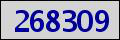

In [327]:
img

In [328]:
img = img.convert('L')

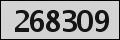

In [329]:
img

In [330]:
import cv2

In [331]:
open_cv_image = numpy.array(img) 
open_cv_image.shape

(40, 120)

In [332]:
open_cv_image

array([[  0,  10,   0, ...,   0,  10,   0],
       [ 14, 188, 215, ..., 215, 188,  14],
       [  0, 217, 223, ..., 223, 217,   0],
       ...,
       [  0, 217, 223, ..., 223, 217,   0],
       [ 14, 188, 215, ..., 215, 188,  14],
       [  0,  10,   0, ...,   0,  10,   0]], dtype=uint8)

In [333]:
import cv2
ret, thresh = cv2.threshold(open_cv_image, 127, 255, 0)

In [335]:
thresh

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       ...,
       [  0, 255, 255, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [336]:
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [337]:
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])

In [341]:
#cnts

In [344]:
ary = []
for (c,_) in cnts:
    (x,y,w,h) = cv2.boundingRect(c)
    #print(x,y,w,h)
    if h == 24:
        ary.append((x,y,w,h) )

In [345]:
ary

[(14, 9, 16, 24),
 (29, 9, 16, 24),
 (45, 9, 16, 24),
 (62, 9, 32, 24),
 (94, 9, 16, 24)]

In [349]:
import os
os.mkdir('images')

Populating the interactive namespace from numpy and matplotlib


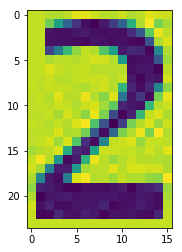

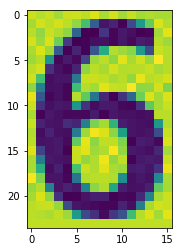

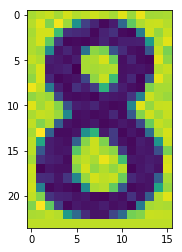

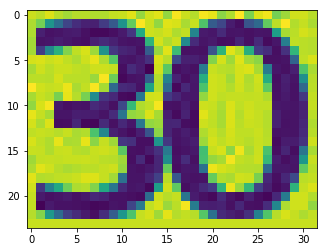

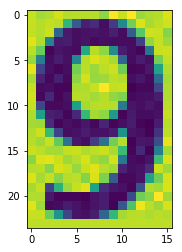

In [350]:
%pylab inline
import os
from matplotlib import pyplot as plt
dest = 'images'
data = []
for idx, (x,y,w,h) in enumerate(ary):
    fig = plt.figure()
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    plt.imshow(thresh)
    plt.savefig(os.path.join(dest, '{}.jpg'.format(idx)), dpi=100)

In [358]:
from PIL import Image
pred = Image.open('images/0.jpg').convert('L')
resize_pred = pred.resize((28,28))

In [359]:
resize_pred

In [367]:
reshape_pred = (numpy.array(resize_pred)/255).reshape(28,28,1)

In [368]:
n = numpy.expand_dims(reshape_pred, axis = 0)

In [371]:
np.argmax(model.predict(n))

2

In [381]:
from PIL import Image
img = Image.open('ImageOut.jpg').convert('L')

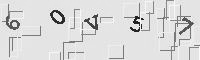

In [382]:
img

In [393]:
import cv2
open_cv_image = numpy.array(img)
ret, thresh = cv2.threshold(open_cv_image, 110, 255, 0)

Populating the interactive namespace from numpy and matplotlib


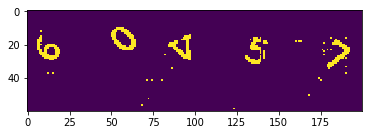

In [394]:
%pylab inline
import matplotlib.pyplot as plt
imgary = 255 - thresh
plt.imshow(imgary)


In [395]:
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [396]:
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])

In [403]:
ary = []
for (c,_) in cnts:
    (x,y,w,h) = cv2.boundingRect(c)
    if h >=  12 and h < 25:
        ary.append((x,y,w,h) )

Populating the interactive namespace from numpy and matplotlib
(5, 14, 16, 17)
(49, 9, 17, 16)
(83, 13, 16, 18)
(132, 15, 9, 12)
(178, 16, 16, 20)


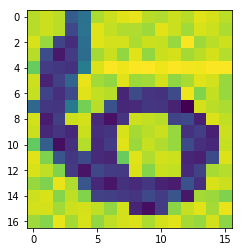

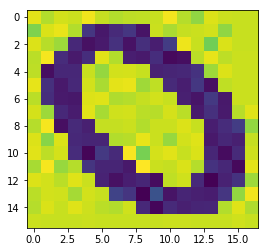

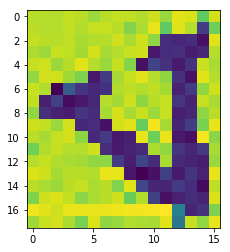

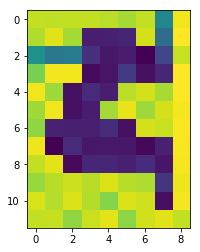

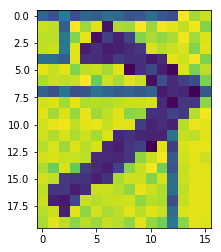

In [405]:
%pylab inline
import os
from matplotlib import pyplot as plt
dest = 'images'
data = []
for idx, (x,y,w,h) in enumerate(ary):
    print((x,y,w,h) )
    fig = plt.figure()
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    plt.imshow(thresh)
    plt.savefig(os.path.join(dest, '{}.jpg'.format(idx)), dpi=100)

In [433]:
from PIL import Image
pred = Image.open('images/4.jpg').convert('L')
resize_pred = pred.resize((28,28))

In [434]:
resize_pred

In [435]:
#numpy.array(resize_pred)

In [436]:
reshape_pred = ((255 - numpy.array(resize_pred))/255).reshape(28,28,1)

In [437]:
n = numpy.expand_dims(reshape_pred, axis = 0)

In [438]:
np.argmax(model.predict(n))

2

## 訓練自己的驗證碼資料庫

### 抓取驗證碼

In [439]:
import requests
res = requests.get('https://serv.gcis.nat.gov.tw/pub/kaptcha.jpg?code=0.4599771997252926')
with open('captcha.jpg', 'wb') as f:
    f.write(res.content)

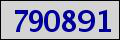

In [440]:
from PIL import Image
Image.open('captcha.jpg')

In [441]:
import os
os.mkdir('digits/')

In [442]:
import random
def getCaptcha(run):
    dest = 'digits'
    res = requests.get('https://serv.gcis.nat.gov.tw/pub/kaptcha.jpg?code={}'.format(random.random()))
    with open('captcha.jpg', 'wb') as f:
        f.write(res.content)
    
    pil_image = Image.open('captcha.jpg').convert('L')
    open_cv_image = numpy.array(pil_image) 
    ret, thresh = cv2.threshold(open_cv_image, 127, 255, 0)
    image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])
    ary = []
    for (c,_) in cnts:
        (x,y,w,h) = cv2.boundingRect(c)
        #print(x,y,w,h)
        if w >= 10 and w <= 25 and h >= 24:
            ary.append((x,y,w,h) )
    data = []
    for idx, (x,y,w,h) in enumerate(ary):
        fig = plt.figure()
        roi = open_cv_image[y:y+h, x:x+w]
        thresh = roi.copy()
        plt.imshow(thresh)
        plt.savefig(os.path.join(dest, '{}_{}.jpg'.format(run,idx)), dpi=100)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


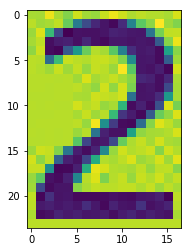

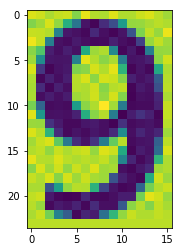

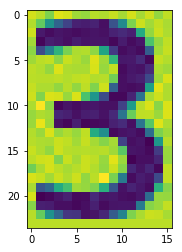

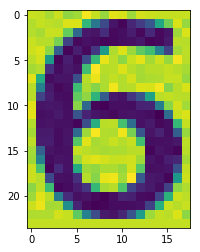

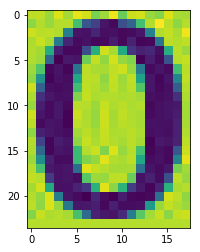

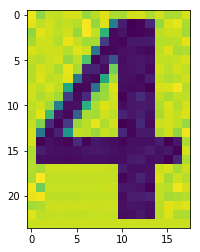

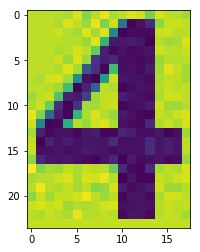

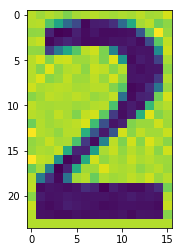

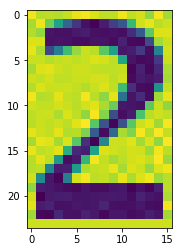

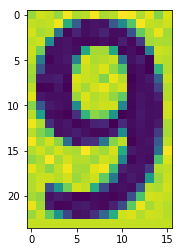

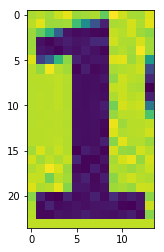

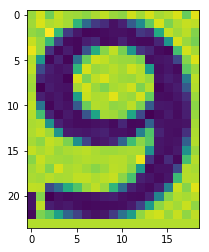

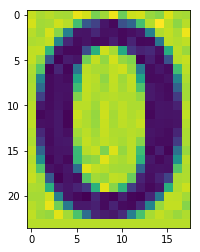

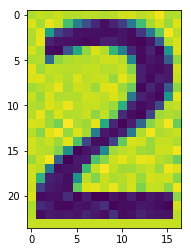

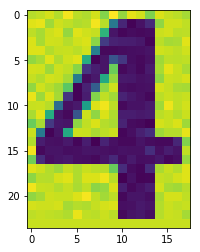

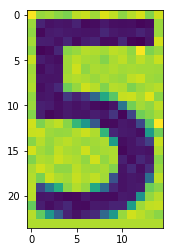

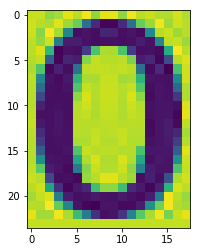

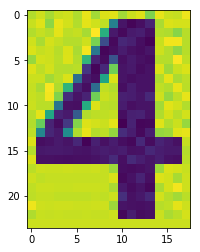

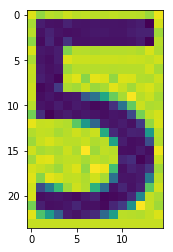

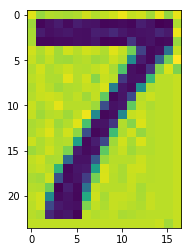

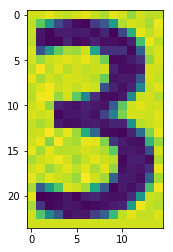

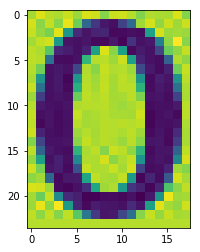

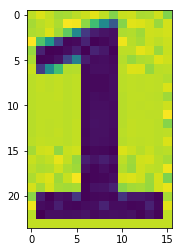

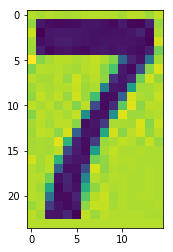

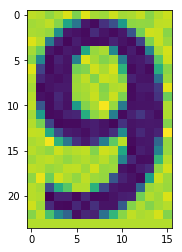

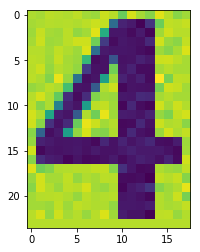

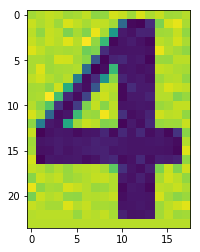

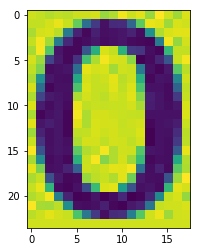

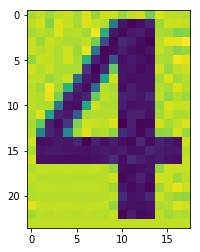

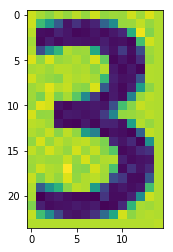

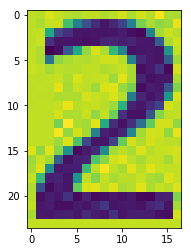

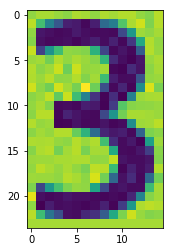

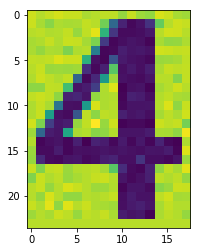

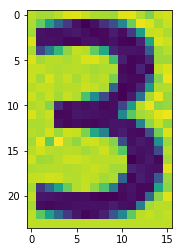

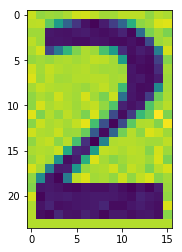

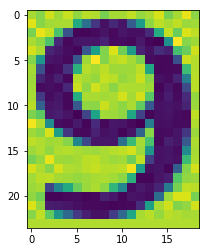

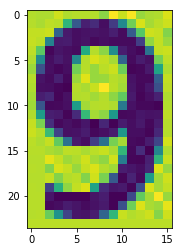

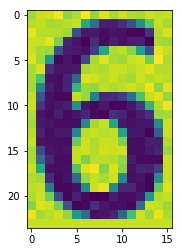

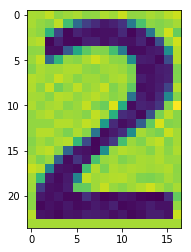

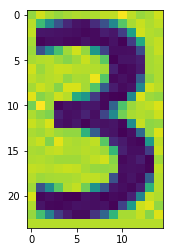

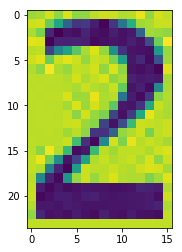

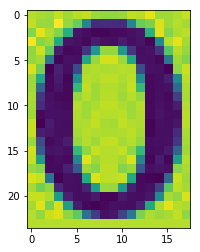

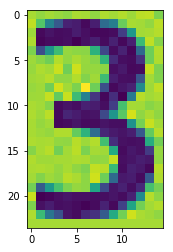

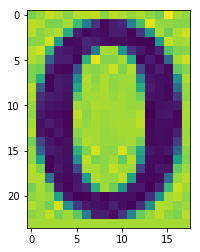

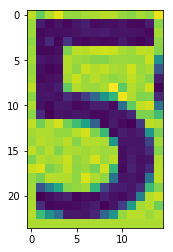

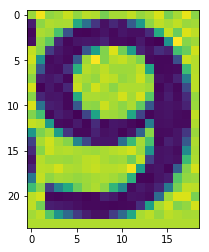

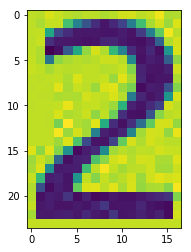

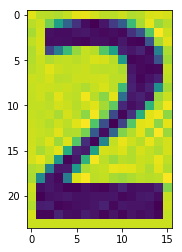

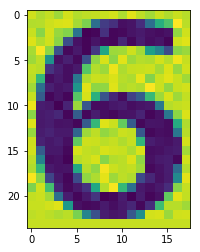

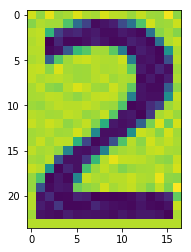

In [444]:
for i in range(10):
    getCaptcha(i)

In [445]:
for i in range(10):
    os.mkdir('digits/{}'.format(i))

In [446]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (60, 40,
3), activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Fully Connected
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                        loss ='categorical_crossentropy', 
                     metrics = ['accuracy'])

In [447]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,     #x坐标保持不变，而对应的y坐标按比例发生平移
                                   zoom_range = 0.2,      #可以让图片在长或宽的方向进行放大
                                   horizontal_flip = True #水平翻转操作
                                  )

In [448]:
training_set = train_datagen.flow_from_directory(
    'digits/', target_size = (60, 40),
     batch_size = 10,
     class_mode = 'categorical')

Found 50 images belonging to 10 classes.


In [ ]:
history = classifier.fit_generator(training_set,
                         nb_epoch=100,
                         nb_val_samples=10,
                         steps_per_epoch = 10,
                         verbose = 1)

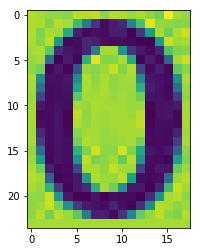

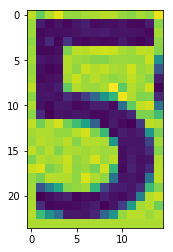

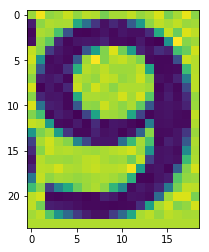

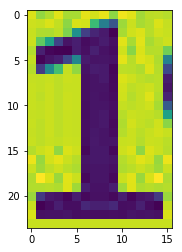

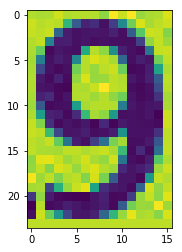

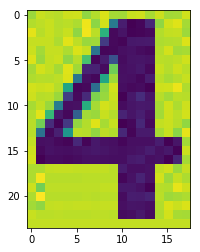

In [452]:
getCaptcha(1)

In [453]:
from keras.preprocessing import image
for f in os.listdir('prediction/'):
    fig = plt.figure()
    test_image = image.load_img('prediction/'+f, target_size= (60,40))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    print(f, classifier.predict_classes(test_image))
    #plt.imshow(img) 

1_0.jpg [0]
1_1.jpg [5]
1_2.jpg [9]
1_3.jpg [1]
1_4.jpg [9]
1_5.jpg [4]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>